## Run A simple whole brain analysis 
- As requested by reviewer 2

In [1]:
import glob
import pandas as pd
import numpy as np
import nilearn
from nilearn import plotting

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
ses = '2'

In [3]:
medication_cond = pd.read_csv('/home/oad4/ketamine_reconsolidation/kpe_sub_condition.csv')

func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/kpe/results/ScriptPart_ses%s/modelfit/_subject_id_*/modelestimate/results/cope7.nii.gz' %(ses))


In [4]:
medication_cond_ses2 = medication_cond[(medication_cond.scr_id!='KPE1578') & (medication_cond.scr_id!='KPE1315')]
subjects_ses2 = medication_cond_ses2.scr_id.values
medication_cond_ses2.groupby('med_cond').count()

,scr_id
med_cond,
0,12
1,13


In [5]:
subjects_ses2

array(['KPE008', 'KPE1223', 'KPE1253', 'KPE1263', 'KPE1293', 'KPE1307',
       'KPE1322', 'KPE1339', 'KPE1343', 'KPE1351', 'KPE1356', 'KPE1364',
       'KPE1369', 'KPE1387', 'KPE1390', 'KPE1403', 'KPE1419', 'KPE1464',
       'KPE1468', 'KPE1480', 'KPE1499', 'KPE1561', 'KPE1573', 'KPE1587',
       'KPE1612'], dtype=object)

In [6]:
func_files.sort()
del func_files[6]  # del 1315

In [151]:
from nilearn.glm.second_level import make_second_level_design_matrix


In [152]:
# design_matrix = pd.DataFrame([1] * len(func_files),
#                              columns=['intercept'])
# generate ket and mid groups for contrasts
design_matrix = pd.DataFrame({'ketamine': medication_cond_ses2.med_cond.values , 'midazolam': 1 - medication_cond_ses2.med_cond.values})
#design_matrix['ketamine'] = medication_cond_ses2.med_cond.values 
#design_matrix['midazolam'] = 1 - medication_cond_ses2.med_cond.values

design_matrix

,ketamine,midazolam
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [153]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=None)
second_level_model = second_level_model.fit(func_files,
                                            design_matrix=design_matrix)

In [154]:
z_map = second_level_model.compute_contrast(second_level_contrast=('ketamine - midazolam'),output_type='z_score')

In [155]:
from nilearn.glm import threshold_stats_img
thresholded_map1, threshold1 = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)

thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=.1, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

The FDR=.05 threshold is inf


/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


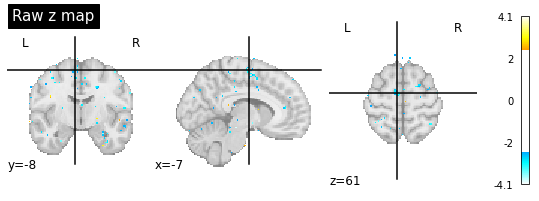

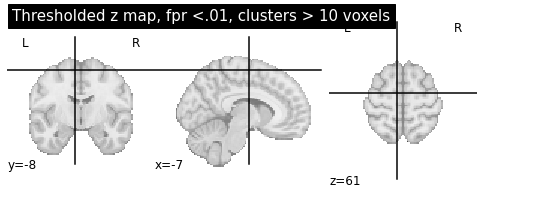

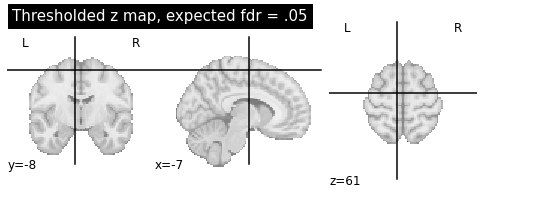

In [156]:
display = plotting.plot_stat_map(z_map, title='Raw z map', threshold=2.5)

plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
    title='Thresholded z map, fpr <.01, clusters > 10 voxels')

plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)
plotting.show()